In this first step, we will create a dataset of Bitcoin, Ethereum and Litecoin daily prices. We will use pandas package to extract the data from [CoinMarketCap history](https://coinmarketcap.com/historical/) and pyplot to plot it.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import time

bitcoin_market_info = pd.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]
bitcoin_market_info = bitcoin_market_info.assign(Date=pd.to_datetime(bitcoin_market_info['Date']))
bitcoin_market_info.loc[bitcoin_market_info['Volume']=="-",'Volume']=0
bitcoin_market_info['Volume'] = bitcoin_market_info['Volume'].astype('int64')
bitcoin_market_info.head()

plt.rcParams['figure.figsize'] = (20, 6)

In [2]:
eth_market_info = pd.read_html("https://coinmarketcap.com/currencies/ethereum/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]
eth_market_info = eth_market_info.assign(Date=pd.to_datetime(eth_market_info['Date']))
eth_market_info.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,2018-08-30,289.75,291.24,275.21,284.11,1513100000,29449252259
1,2018-08-29,296.16,297.07,287.29,289.31,1474460000,30094775053
2,2018-08-28,286.65,297.40,283.57,296.50,1513350000,29122157621
3,2018-08-27,275.35,285.60,273.65,285.60,1406790000,27968567433
4,2018-08-26,279.52,279.52,272.44,275.20,1206650000,28386921151


In [3]:
ltc_market_info = pd.read_html("https://coinmarketcap.com/currencies/litecoin/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]
ltc_market_info = ltc_market_info.assign(Date=pd.to_datetime(ltc_market_info['Date']))
ltc_market_info.loc[ltc_market_info['Volume']=="-",'Volume']=0
ltc_market_info['Volume'] = ltc_market_info['Volume'].astype('int64')

ltc_market_info.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,2018-08-30,61.77,62.03,58.92,60.32,219094000,3586334101
1,2018-08-29,63.03,63.39,60.74,61.77,220637000,3658762571
2,2018-08-28,60.23,63.40,59.62,63.02,246764000,3495213551
3,2018-08-27,57.26,60.42,56.93,60.25,228072000,3322225838
4,2018-08-26,58.05,58.11,56.24,57.33,206572000,3367399961


In [4]:
import sys
from PIL import Image
import io

if sys.version_info[0] < 3:
    import urllib2 as urllib
    bt_img = urllib.urlopen("http://logok.org/wp-content/uploads/2016/10/Bitcoin-Logo-640x480.png")
    eth_img = urllib.urlopen("https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Ethereum_logo_2014.svg/256px-Ethereum_logo_2014.svg.png")
else:
    import urllib
    bt_img = urllib.request.urlopen("http://logok.org/wp-content/uploads/2016/10/Bitcoin-Logo-640x480.png")
    eth_img = urllib.request.urlopen("https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Ethereum_logo_2014.svg/256px-Ethereum_logo_2014.svg.png")

image_file = io.BytesIO(bt_img.read())
bitcoin_im = Image.open(image_file)

image_file = io.BytesIO(eth_img.read())
eth_im = Image.open(image_file)
width_eth_im , height_eth_im  = eth_im.size
eth_im = eth_im.resize((int(eth_im.size[0]*0.8), int(eth_im.size[1]*0.8)), Image.ANTIALIAS)

In [5]:
bitcoin_market_info.columns = [bitcoin_market_info.columns[0]]+['bt_'+i for i in bitcoin_market_info.columns[1:]]
eth_market_info.columns = [eth_market_info.columns[0]]+['eth_'+i for i in eth_market_info.columns[1:]]
ltc_market_info.columns = [ltc_market_info.columns[0]]+['ltc_'+i for i in ltc_market_info.columns[1:]]

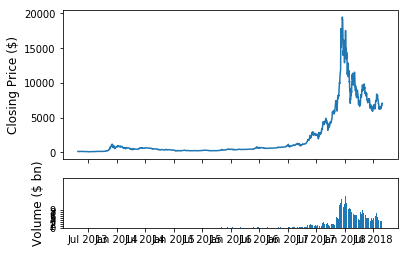

In [6]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]})
ax1.set_ylabel('Closing Price ($)',fontsize=12)
ax2.set_ylabel('Volume ($ bn)',fontsize=12)
ax2.set_yticks([int('%d000000000'%i) for i in range(10)])
ax2.set_yticklabels(range(10))
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,7]])
ax1.plot(bitcoin_market_info['Date'].astype(datetime.datetime),bitcoin_market_info['bt_Open*'])
ax2.bar(bitcoin_market_info['Date'].astype(datetime.datetime).values, bitcoin_market_info['bt_Volume'].values)
plt.show()

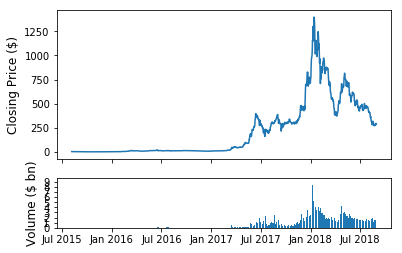

In [7]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]})
ax1.set_ylabel('Closing Price ($)',fontsize=12)
ax2.set_ylabel('Volume ($ bn)',fontsize=12)
ax2.set_yticks([int('%d000000000'%i) for i in range(10)])
ax2.set_yticklabels(range(10))
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,7]])
ax1.plot(eth_market_info['Date'].astype(datetime.datetime),eth_market_info['eth_Open*'])
ax2.bar(eth_market_info['Date'].astype(datetime.datetime).values, eth_market_info['eth_Volume'].values)
plt.show()

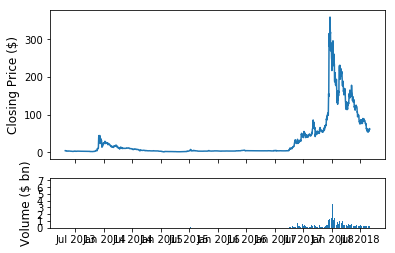

In [8]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]})
#ax1.set_yscale('log')
ax1.set_ylabel('Closing Price ($)',fontsize=12)
ax2.set_ylabel('Volume ($ bn)',fontsize=12)
ax2.set_yticks([int('%d000000000'%i) for i in range(10)])
ax2.set_yticklabels(range(10))
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,7]])
ax1.plot(ltc_market_info['Date'].astype(datetime.datetime),ltc_market_info['ltc_Open*'])
ax2.bar(ltc_market_info['Date'].astype(datetime.datetime).values, ltc_market_info['ltc_Volume'].values)
plt.show()

In [9]:
market_info = pd.merge(bitcoin_market_info,eth_market_info, on=['Date'])
market_info = pd.merge(market_info,ltc_market_info, on=['Date']) 
market_info = market_info[market_info['Date']>='2016-01-01']
for coins in ['bt_', 'eth_', 'ltc_']: 
    kwargs = { coins+'day_diff': lambda x: (x[coins+'Close**']-x[coins+'Open*'])/x[coins+'Open*']}
    market_info = market_info.assign(**kwargs)
market_info.head()

,Date,bt_Open*,bt_High,bt_Low,bt_Close**,bt_Volume,bt_Market Cap,eth_Open*,eth_High,eth_Low,...,eth_Market Cap,ltc_Open*,ltc_High,ltc_Low,ltc_Close**,ltc_Volume,ltc_Market Cap,bt_day_diff,eth_day_diff,ltc_day_diff
0,2018-08-30,7043.76,7072.69,6834.69,6978.23,4463250000,121426092460,289.75,291.24,275.21,...,29449252259,61.77,62.03,58.92,60.32,219094000,3586334101,-0.009303,-0.019465,-0.023474
1,2018-08-29,7091.71,7113.30,6970.82,7047.16,4145880000,122240446825,296.16,297.07,287.29,...,30094775053,63.03,63.39,60.74,61.77,220637000,3658762571,-0.006282,-0.023129,-0.019990
2,2018-08-28,6891.08,7109.56,6882.34,7096.28,4659940000,118768797345,286.65,297.40,283.57,...,29122157621,60.23,63.40,59.62,63.02,246764000,3495213551,0.029778,0.034362,0.046322
3,2018-08-27,6710.80,6884.64,6689.71,6884.64,4019000000,115646248487,275.35,285.60,273.65,...,27968567433,57.26,60.42,56.93,60.25,228072000,3322225838,0.025905,0.037225,0.052218
4,2018-08-26,6754.64,6774.75,6620.75,6707.26,3295500000,116387236698,279.52,279.52,272.44,...,28386921151,58.05,58.11,56.24,57.33,206572000,3367399961,-0.007014,-0.015455,-0.012403
